# Assignment 1: Machine Learning Lab
* Pulkit Mahajan (2019ucs0073)
* Shivank Kapila (2019ume0201)
## Data Pre-Processing
### Importing libraries and packages

In [90]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

Importing datasets

In [91]:
df1 = pd.read_csv('./data/changes-visitors-covid.csv')
df1 = df1[df1.Entity == "India"]
df1.rename(columns = {'Entity': 'location', 'Code':'iso_code', 'Day':'date'}, inplace = True)
print(df1.shape)
df1.head()

(471, 9)


,location,iso_code,date,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces
23897,India,IND,2020-02-17,0.667,1.667,0.000,2.000,3.000,3.000
23898,India,IND,2020-02-18,0.500,1.750,0.000,2.000,3.250,3.000
23899,India,IND,2020-02-19,0.400,1.800,0.200,1.800,2.800,3.200
23900,India,IND,2020-02-20,0.500,2.000,0.000,2.333,3.167,3.333
23901,India,IND,2020-02-21,-0.143,1.714,0.714,1.429,3.571,0.143


In [92]:
df2 = pd.read_csv('./data/covid-data.csv', usecols = ['iso_code', 'continent', 'location', 'date', 'new_cases'])
df2 = df2[df2.iso_code == 'IND']
print(df2.head(5))
print(df2.shape)

      iso_code continent location        date  new_cases
38584      IND      Asia    India  2020-01-30        1.0
38585      IND      Asia    India  2020-01-31        0.0
38586      IND      Asia    India  2020-02-01        0.0
38587      IND      Asia    India  2020-02-02        1.0
38588      IND      Asia    India  2020-02-03        1.0
(491, 5)


In [93]:
covid_data = pd.merge(df1, df2, on = ['date', 'location', 'iso_code'])
covid_data.head()

,location,iso_code,date,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,continent,new_cases
0,India,IND,2020-02-17,0.667,1.667,0.000,2.000,3.000,3.000,Asia,0.0
1,India,IND,2020-02-18,0.500,1.750,0.000,2.000,3.250,3.000,Asia,0.0
2,India,IND,2020-02-19,0.400,1.800,0.200,1.800,2.800,3.200,Asia,0.0
3,India,IND,2020-02-20,0.500,2.000,0.000,2.333,3.167,3.333,Asia,0.0
4,India,IND,2020-02-21,-0.143,1.714,0.714,1.429,3.571,0.143,Asia,0.0


In [94]:
covid_data.nunique()
#since there are only unique values in 'location', 'iso_code', 'continent' we can drop these columns

location                   1
iso_code                   1
date                     471
retail_and_recreation    262
grocery_and_pharmacy     268
residential              143
transit_stations         270
parks                    254
workplaces               253
continent                  1
new_cases                448
dtype: int64

In [95]:
covid_data = covid_data.drop(['location', 'iso_code', 'continent'], axis = 1)
covid_data.head(1)

,date,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,new_cases
0,2020-02-17,0.667,1.667,0.0,2.0,3.0,3.0,0.0


### Data Cleaning

In [96]:
mobility_columns = ['retail_and_recreation', 'grocery_and_pharmacy', 'residential' ,'transit_stations' ,'parks','workplaces']

In [97]:
covid_data.dtypes

date                      object
retail_and_recreation    float64
grocery_and_pharmacy     float64
residential              float64
transit_stations         float64
parks                    float64
workplaces               float64
new_cases                float64
dtype: object

In [98]:
#checking for any null values
covid_data.isnull().sum(axis = 0)

date                     0
retail_and_recreation    0
grocery_and_pharmacy     0
residential              0
transit_stations         0
parks                    0
workplaces               0
new_cases                0
dtype: int64

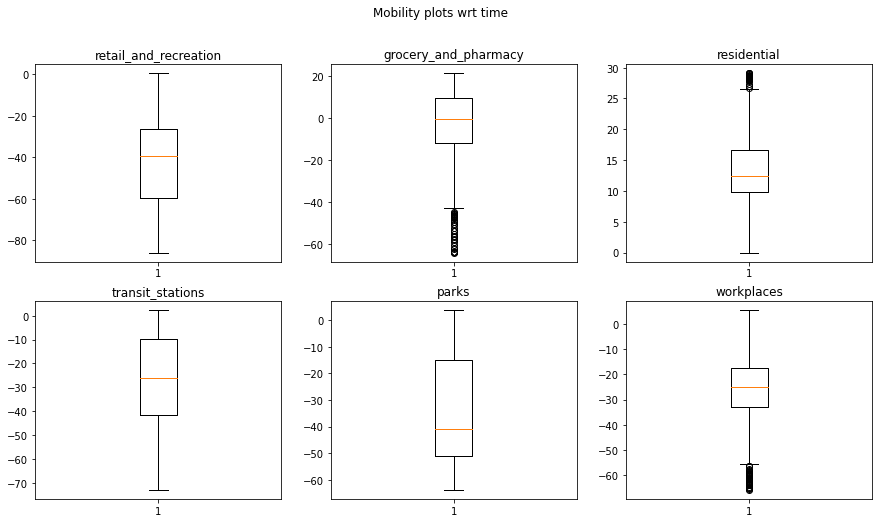

In [99]:
fig, plots = plt.subplots(2, 3)
fig.set_figheight(8)
fig.set_figwidth(15)
fig.suptitle('Mobility plots wrt time')
for i, column in enumerate(mobility_columns):
    ax = plots[i//3][i%3]
    ax.boxplot(covid_data[column])
    ax.set_title(column)

No null values exist in our dataset

### Saving the clean data for separate use in model.py

In [100]:
covid_data.to_csv('./data/covid_data_india.csv',index = False)

In [101]:
# visualizing the dataset

<AxesSubplot:>

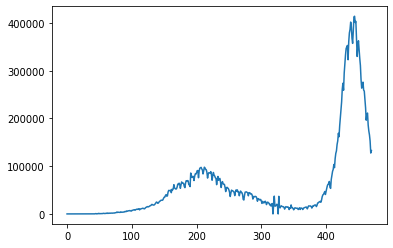

In [102]:
covid_data.new_cases.plot()
# we can see that the target column is basically a time series which has to be predicted, 
# given the corresponding mobility data.
# this is indeed the actual data that can we verified from google. (this statement is logical pertaining to this scenario only)

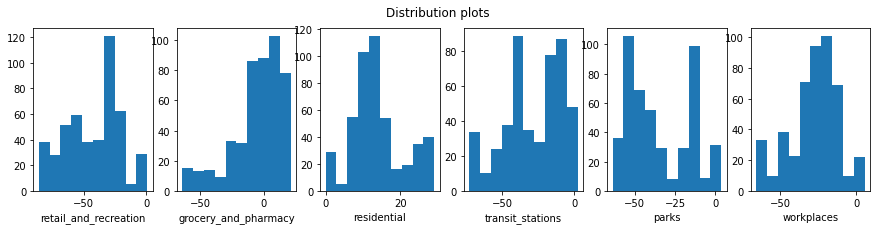

In [103]:
fig, plots = plt.subplots(1,6)
fig.set_figheight(3)
fig.set_figwidth(15)
fig.suptitle('Distribution plots')
for i, column in enumerate(mobility_columns):
    plots[i].hist(covid_data[column])
    plots[i].set_xlabel(column)
#     plots[i].xlabel(column)

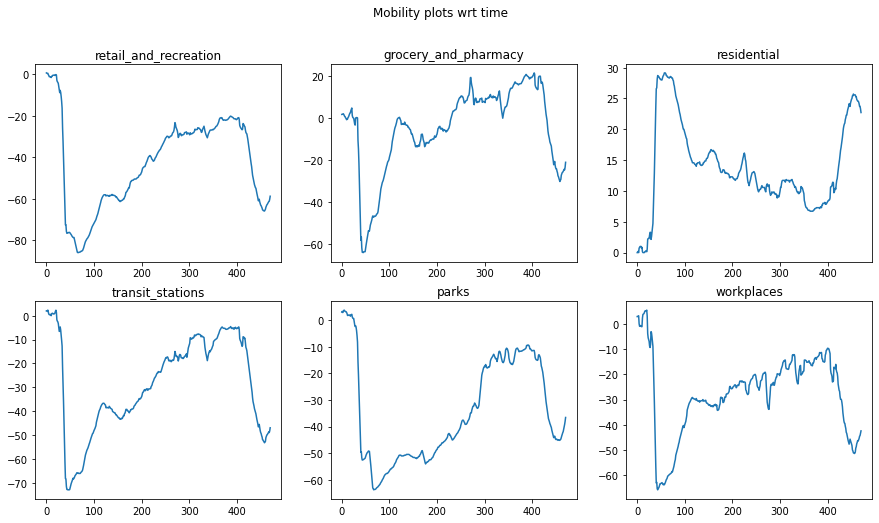

In [104]:
fig, plots = plt.subplots(2, 3)
fig.set_figheight(8)
fig.set_figwidth(15)
fig.suptitle('Mobility plots wrt time')
for i, column in enumerate(mobility_columns):
    ax = plots[i//3][i%3]
    ax.plot(covid_data[column])
    ax.set_title(column)

we can see that the plots follow similar trends wrt time axis. Plot[1][3] is however following a trend that seems to be reverse of others. This should obviously be because people preferred staying at home due to the scenario. Also looking at residential and workspace closely, the trends seem to be almost mirror images of each other.  
Also we have to consider that in all cases 0 or a number slightly higher than 0 must have been the base line quantity in the pre covid era

In [105]:
# correlation matrix for dataset
covid_data.corr()

,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,new_cases
retail_and_recreation,1.000000,0.820786,-0.925891,0.970580,0.906370,0.928552,-0.134351
grocery_and_pharmacy,0.820786,1.000000,-0.840430,0.913562,0.664009,0.867805,-0.052792
residential,-0.925891,-0.840430,1.000000,-0.928817,-0.768427,-0.969960,0.313037
transit_stations,0.970580,0.913562,-0.928817,1.000000,0.880851,0.951951,-0.153770
parks,0.906370,0.664009,-0.768427,0.880851,1.000000,0.794867,-0.119766
workplaces,0.928552,0.867805,-0.969960,0.951951,0.794867,1.000000,-0.232405
new_cases,-0.134351,-0.052792,0.313037,-0.153770,-0.119766,-0.232405,1.000000


#### import self written modules

In [141]:
from utils import train_test_split
from utils import R2_score
from KMeans import KMeansClustering 
from decision_tree_regressor import DecisionTreeRegressor 

In [142]:
# importing dataset removing the date column
df = pd.read_csv("./data/covid_data_india.csv").iloc[:,1:]
print("shape of dataset: {}".format(df.shape))
df.head()

shape of dataset: (471, 7)


,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,new_cases
0,0.667,1.667,0.000,2.000,3.000,3.000,0.0
1,0.500,1.750,0.000,2.000,3.250,3.000,0.0
2,0.400,1.800,0.200,1.800,2.800,3.200,0.0
3,0.500,2.000,0.000,2.333,3.167,3.333,0.0
4,-0.143,1.714,0.714,1.429,3.571,0.143,0.0


In [189]:
np.random.seed(5)
train_df, test_df = train_test_split(df, test_size = 10, shuffle = True)
print(train_df.shape, test_df.shape)

(425, 7) (47, 7)


In [190]:
train_df.head()

,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,new_cases
466,-61.714,-25.000,24.143,-49.143,-41.000,-45.429,173790.0
145,-58.714,-6.571,15.143,-41.143,-51.000,-31.143,28606.0
327,-27.429,9.429,11.429,-8.571,-14.857,-12.571,36867.0
433,-48.571,-6.286,20.143,-34.429,-36.000,-37.000,352991.0
247,-32.429,9.429,12.857,-19.429,-41.143,-20.000,55839.0


## Creating a decistion tree using ID3-A algorithm
> We have implemented ID3-A algorithm in decistion_tree_regressor.py python file

In [145]:
regressor = DecisionTreeRegressor(train_df, min_samples = 2, max_depth = 5, algo = 'id3') #algo can also be set to "CART"
tree = regressor.build_tree(train_df)

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5


In [146]:
print("Training R_squared: {}\nTest R_squared: {}".format(regressor.r_squared(train_df, tree), regressor.r_squared(test_df, tree)))

Training R_squared: 0.9724937443758273
Test R_squared: 0.9865497259068784


## Visualizing our model's outcomes

### Plotting Actual V/s Predicted for Test Data

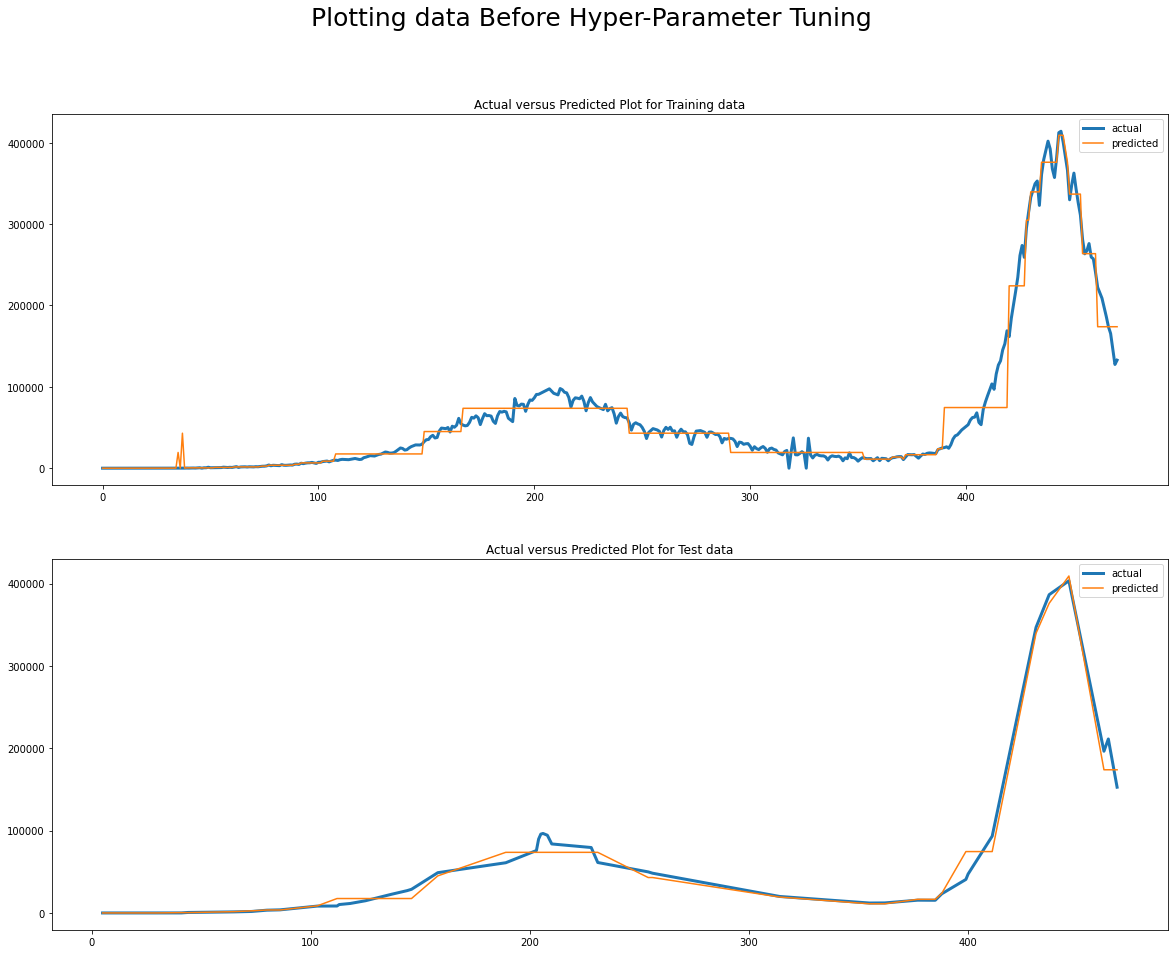

In [147]:
actual_values = train_df.iloc[:,-1].sort_index()
predicted_values = train_df.apply(regressor.predict_sample, axis = 1, args = (tree,)).sort_index()
fig, ax = plt.subplots(2,1, figsize = (20,15))
ax[0].plot(actual_values, linewidth = 3, label = "actual")
ax[0].plot(predicted_values, label = "predicted")
ax[0].legend()
ax[0].set_title("Actual versus Predicted Plot for Training data")


actual_values = test_df.iloc[:,-1].sort_index()
predicted_values = test_df.apply(regressor.predict_sample, axis = 1, args = (tree,)).sort_index()
ax[1].plot(actual_values, linewidth = 3, label = "actual")
ax[1].plot(predicted_values, label = "predicted")
ax[1].legend()
ax[1].set_title("Actual versus Predicted Plot for Test data")

plt.suptitle("Plotting data Before Hyper-Parameter Tuning",size = 25)
plt.savefig("./plots/Actual vs Predicted.png")
plt.show()

### Hyper-parameter tuning and Pruning using grid search 

In [148]:
grid_search = {"max_depth": [], "min_samples": [], "r_squared_train": [], "r_squared_val": []}
# grid_search = {"max_depth":[], "min_samples":[]}
for max_depth in range(5,20):
    for min_samples in range(3,20,4):
        regressor = DecisionTreeRegressor(train_df, min_samples = min_samples, max_depth = max_depth, algo = 'id3')
        tree = regressor.build_tree(train_df)
        
        r_squared_train = regressor.r_squared(train_df, tree)
        r_squared_val = regressor.r_squared(test_df, tree)
        
        grid_search["max_depth"].append(max_depth)
        grid_search["min_samples"].append(min_samples)
        grid_search["r_squared_train"].append(r_squared_train)
        grid_search["r_squared_val"].append(r_squared_val)
        
    print(f"Progress: Iteration {max_depth}/20")
        
grid_search = pd.DataFrame(grid_search)
grid_search.sort_values("r_squared_val", ascending=False, inplace = True)

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5


/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4


/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4


/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 4


/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 3
Progress: Iteration 5/20


/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 4
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 4


/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 3
Progress: Iteration 6/20


/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 4
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 3
Progress: Iteration 7/20


/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 5
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 3
Progress: Iteration 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 5
returning a leaf of depth 8
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 6
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 9
returning a leaf of depth 9
returning a le

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 10
returning a l

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf o

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 11
returning a l

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 9
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 11
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 11
returning a l

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 9
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 11
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 11
returning a l

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 9
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 11
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 11
returning a l

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 9
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 11
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 11
returning a l

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 9
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 11
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 11
returning a l

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 9
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 11
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 11
returning a l

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 9
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 11
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 11
returning a l

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 9
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 11
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 11
returning a l

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of 

In [149]:
grid_search.to_csv("./data/hyperparameterTuningID3.csv")

In [150]:
grid_search

,max_depth,min_samples,r_squared_train,r_squared_val
20,9,3,0.998877,0.996961
35,12,3,0.999455,0.996742
15,8,3,0.998098,0.996731
70,19,3,0.999504,0.996705
65,18,3,0.999504,0.996705
...,...,...,...,...
1,5,7,0.972010,0.986219
9,6,19,0.951710,0.985732
3,5,15,0.944727,0.983138
2,5,11,0.950650,0.981542


```
From the grid search table we can see that the optimal value for the max_depth and min_samples parameter should be set to 9 and 3 respectively
```

> Now show the same results using the RSS version of the algorithm that we are showing as a parallel approach to CART

### Retraining the decision tree on optimal parameters of the tree

In [151]:
regressor_id3 = DecisionTreeRegressor(train_df, min_samples = 3, max_depth = 9, algo = 'id3')
tree_id3 = regressor_id3.build_tree(train_df)

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 5
returning a leaf of depth 8
returning a leaf of 

In [153]:
print("Training R_squared: {}\nTest R_squared: {}".format(regressor_id3.r_squared(train_df, tree_id3), regressor_id3.r_squared(test_df, tree_id3)))

Training R_squared: 0.9988771601847459
Test R_squared: 0.9969609373394662


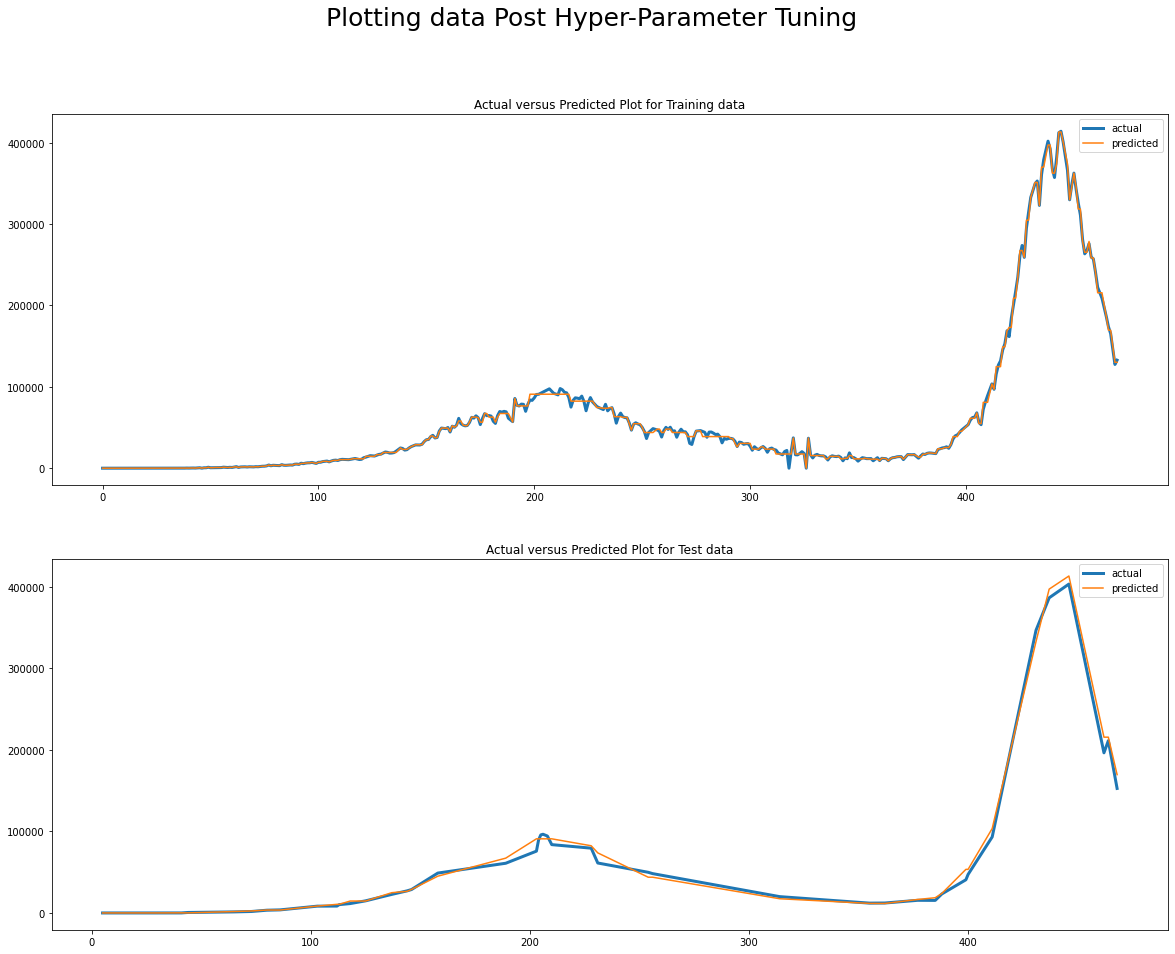

In [164]:
actual_values = train_df.iloc[:,-1].sort_index()
predicted_values = train_df.apply(regressor_id3.predict_sample, axis = 1, args = (tree_id3,)).sort_index()
fig, ax = plt.subplots(2,1, figsize = (20,15))
ax[0].plot(actual_values, linewidth = 3, label = "actual")
ax[0].plot(predicted_values, label = "predicted")
ax[0].legend()
ax[0].set_title("Actual versus Predicted Plot for Training data")


actual_values = test_df.iloc[:,-1].sort_index()
predicted_values = test_df.apply(regressor_id3.predict_sample, axis = 1, args = (tree_id3,)).sort_index()
ax[1].plot(actual_values, linewidth = 3, label = "actual")
ax[1].plot(predicted_values, label = "predicted")
ax[1].legend()
ax[1].set_title("Actual versus Predicted Plot for Test data")

plt.suptitle("Plotting data Post Hyper-Parameter Tuning",size = 25)
plt.savefig("./plots/Actual vs Predicted post Pruning.png")
plt.show()

## Creating a decistion tree using CART algorithm
> the DecisionTreeRegressor class handles both CART as well as ID3-A algorithms

In [134]:
regressor_cart = DecisionTreeRegressor(train_df, min_samples = 2, max_depth = 5, algo = 'CART') #algo can also be set to "CART"
tree_cart = regressor_cart.build_tree(train_df)

returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 3
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 3


In [155]:
print("Training R_squared: {}\nTest R_squared: {}".format(regressor_cart.r_squared(train_df, tree_cart), regressor_cart.r_squared(test_df, tree_cart)))

Training R_squared: 0.3099597497884021
Test R_squared: 0.5512071464939707


In [156]:
grid_search = {"max_depth": [], "min_samples": [], "r_squared_train": [], "r_squared_val": []}
# grid_search = {"max_depth":[], "min_samples":[]}
for max_depth in range(5,20):
    for min_samples in range(3,20,4):
        regressor = DecisionTreeRegressor(train_df, min_samples = min_samples, max_depth = max_depth, algo = 'CART')
        tree = regressor.build_tree(train_df)
        
        r_squared_train = regressor.r_squared(train_df, tree)
        r_squared_val = regressor.r_squared(test_df, tree)
        
        grid_search["max_depth"].append(max_depth)
        grid_search["min_samples"].append(min_samples)
        grid_search["r_squared_train"].append(r_squared_train)
        grid_search["r_squared_val"].append(r_squared_val)
        
    print(f"Progress: Iteration {max_depth}/20")
        
grid_search = pd.DataFrame(grid_search)
grid_search.sort_values("r_squared_val", ascending=False, inplace = True)

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5


/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4


/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4


/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 4


/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 3
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 3
Progress: Iteration 5/20


/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 4
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 4


/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 4
returning a leaf of depth 3
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 3
Progress: Iteration 6/20


/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 4
returning a leaf of depth 3
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 3
Progress: Iteration 7/20


/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 6
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 6
returning a leaf of depth 4
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 4
returning a leaf of depth 3
returning a leaf of depth 4
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 8
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of dep

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
retu

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 10
returning a leaf of depth 10
returning 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of d

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 4
returni

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a lea

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 12
returning a leaf of d

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 11
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of dept

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 5
returning a leaf of depth 6
retur

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 10
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a le

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of d

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 11
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of dept

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
ret

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 10
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a le

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of d

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 11
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 13
returning a leaf of depth 14
returning a leaf of depth 14
returning a leaf of depth 14
returning a leaf of depth 14
returning a leaf of depth 13
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of dep

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
ret

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 10
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a le

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of d

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 11
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 13
returning a leaf of depth 15
returning a leaf of depth 15
returning a leaf of depth 14
returning a leaf of depth 14
returning a leaf of depth 15
returning a leaf of depth 15
returning a leaf of depth 13
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 10
returning a leaf of dep

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
ret

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 10
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a le

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of d

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 11
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 13
returning a leaf of depth 15
returning a leaf of depth 15
returning a leaf of depth 14
returning a leaf of depth 14
returning a leaf of depth 15
returning a leaf of depth 15
returning a leaf of depth 13
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 10
returning a leaf of dep

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
ret

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 10
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a le

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of d

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 11
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 13
returning a leaf of depth 15
returning a leaf of depth 15
returning a leaf of depth 14
returning a leaf of depth 14
returning a leaf of depth 15
returning a leaf of depth 15
returning a leaf of depth 13
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 10
returning a leaf of dep

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
ret

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 10
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a le

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of d

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 11
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 13
returning a leaf of depth 15
returning a leaf of depth 15
returning a leaf of depth 14
returning a leaf of depth 14
returning a leaf of depth 15
returning a leaf of depth 15
returning a leaf of depth 13
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 10
returning a leaf of dep

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
ret

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 10
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a le

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of d

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 11
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 13
returning a leaf of depth 15
returning a leaf of depth 15
returning a leaf of depth 14
returning a leaf of depth 14
returning a leaf of depth 15
returning a leaf of depth 15
returning a leaf of depth 13
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 10
returning a leaf of dep

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
ret

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 10
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a le

In [158]:
grid_search.to_csv("./data/hyperparameterTuningCART.csv")
grid_search.head()

,max_depth,min_samples,r_squared_train,r_squared_val
68,18,15,0.974891,0.969947
73,19,15,0.974891,0.969947
63,17,15,0.974891,0.969947
53,15,15,0.974891,0.969947
58,16,15,0.974891,0.969947


> We can say that min_samples = 15 and max_depth = 18 should do the job

In [160]:
regressor_cart = DecisionTreeRegressor(train_df, min_samples = 15, max_depth = 18, algo = "CART")
tree_cart = regressor_cart.build_tree(train_df)

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 11
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning

In [165]:
print("Training R_squared: {}\nTest R_squared: {}".format(regressor_cart.r_squared(train_df, tree_cart), regressor_cart.r_squared(test_df, tree_cart)))

Training R_squared: 0.9748913877586478
Test R_squared: 0.9699469005965266


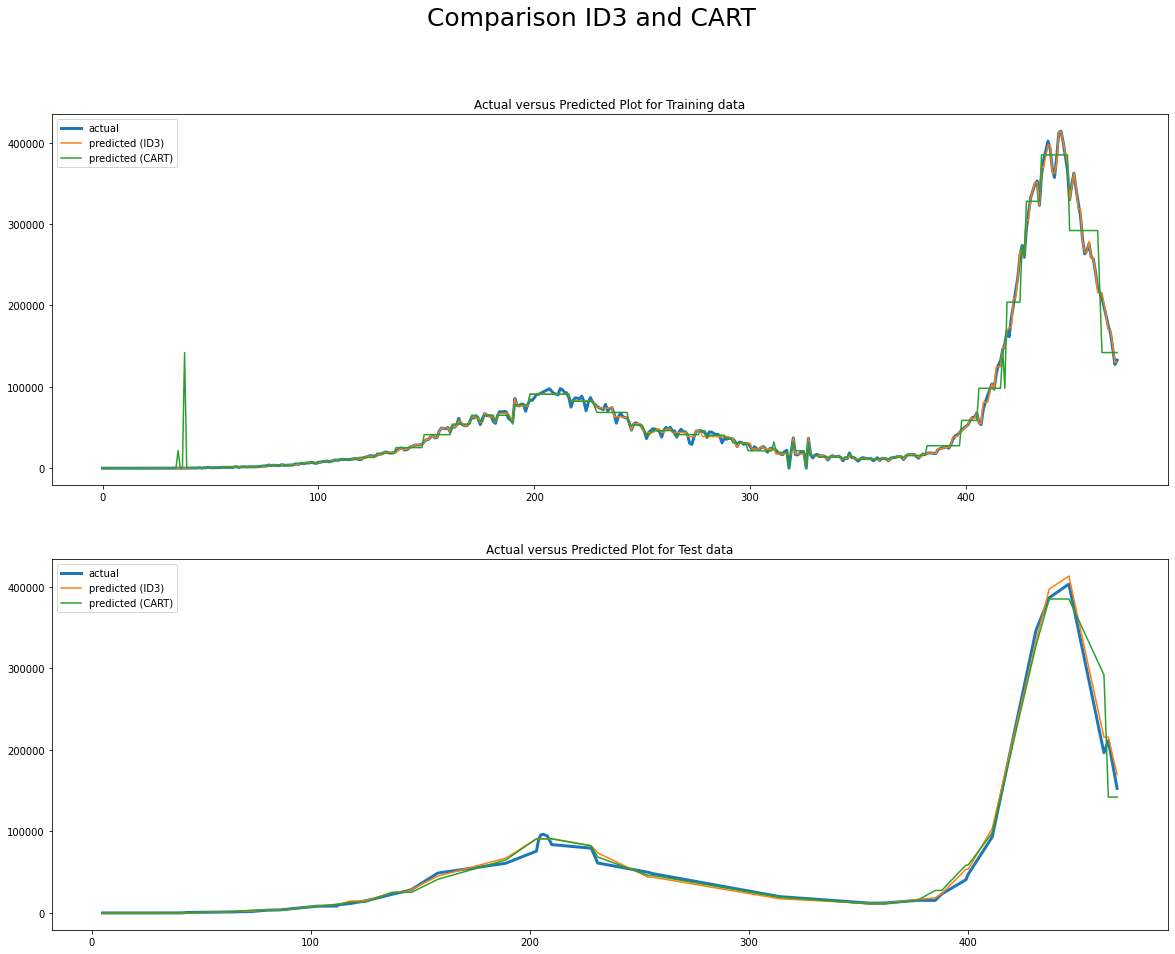

In [163]:
actual_values = train_df.iloc[:,-1].sort_index()
predicted_values_id3 = train_df.apply(regressor_id3.predict_sample, axis = 1, args = (tree_id3,)).sort_index()
predicted_values_cart = train_df.apply(regressor_cart.predict_sample, axis = 1, args = (tree_cart,)).sort_index()
fig, ax = plt.subplots(2,1, figsize = (20,15))
ax[0].plot(actual_values, linewidth = 3, label = "actual")
ax[0].plot(predicted_values_id3, label = "predicted (ID3)")
ax[0].plot(predicted_values_cart, label = "predicted (CART)")
ax[0].legend()
ax[0].set_title("Actual versus Predicted Plot for Training data")


actual_values = test_df.iloc[:,-1].sort_index()
predicted_values_id3 = test_df.apply(regressor_id3.predict_sample, axis = 1, args = (tree_id3,)).sort_index()
predicted_values_cart = test_df.apply(regressor_cart.predict_sample, axis = 1, args = (tree_cart,)).sort_index()
ax[1].plot(actual_values, linewidth = 3, label = "actual")
ax[1].plot(predicted_values_id3, label = "predicted (ID3)")
ax[1].plot(predicted_values_cart, label = "predicted (CART)")
ax[1].legend()
ax[1].set_title("Actual versus Predicted Plot for Test data")
plt.suptitle("Comparison ID3 and CART",size = 25)
plt.savefig("./plots/Actual vs Predicted post Pruning ID3 vs CART.png")
plt.show()

### Results and Conclusions. PART I

| Algorithm     | R_squared_Train      | R_squared_Test     |
| ------------- | ------------- | -------- |
| ID3          | 0.9988771601847459         | 0.9969609373394662  |
| CART           | 0.9748913877586478         | 0.9699469005965266  |

> We can see that in our case ID3 is working much better than CART algorithm when we talk about using a single decision tree.  
* Further we will demonstrate the use of KMeans forest to deal with the task at hand.  
* KMeans forest is kind of like RandomForest in some sense but with the "random" part completely removed from picture.  
* We cluster the entire dataset into K clusters and each cluster is assigned a personal tree.  
* While testing new unseen examples, an example is assigned to the cluster it resembles the most to, and then the decision tree for that cluster is used to make a prediction on the example

# Question 2
## KMeans Forest with ID3-A Trees

In [196]:
buffer = train_df

In [191]:
from utils import R2_score
from KMeans import KMeansClustering 

In [192]:
train_df.head()

,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,new_cases
466,-61.714,-25.000,24.143,-49.143,-41.000,-45.429,173790.0
145,-58.714,-6.571,15.143,-41.143,-51.000,-31.143,28606.0
327,-27.429,9.429,11.429,-8.571,-14.857,-12.571,36867.0
433,-48.571,-6.286,20.143,-34.429,-36.000,-37.000,352991.0
247,-32.429,9.429,12.857,-19.429,-41.143,-20.000,55839.0


> removing the last column for passing the data to KMeans clustering algorithm


In [193]:
train_clusters = train_df.iloc[:,:-1]
train_clusters.head()

,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces
466,-61.714,-25.000,24.143,-49.143,-41.000,-45.429
145,-58.714,-6.571,15.143,-41.143,-51.000,-31.143
327,-27.429,9.429,11.429,-8.571,-14.857,-12.571
433,-48.571,-6.286,20.143,-34.429,-36.000,-37.000
247,-32.429,9.429,12.857,-19.429,-41.143,-20.000


### Finding Optimal value of K using Elbow Method

In [194]:
#first we have to find the optimal number of clusters for our algorithm
inertia_log = []
for i in range(1,20):
    kmeans = KMeansClustering(i)
    classes, inertia = kmeans.fit(train_clusters)
    inertia_log.append(inertia)

Inertia for K = 1 = 16495.363263682106
Inertia for K = 2 = 9417.351221424673
Inertia for K = 3 = 6987.219628044046
Inertia for K = 4 = 6176.399943030248
Inertia for K = 5 = 5893.037560657687
Inertia for K = 6 = 4819.748265028336
Inertia for K = 7 = 4700.617929712851
Inertia for K = 8 = 4646.1724692524795
Inertia for K = 9 = 4603.880336973352
Inertia for K = 10 = 4147.258179702448
Inertia for K = 11 = 4130.365202959189
Inertia for K = 12 = 4226.867938791227
Inertia for K = 13 = 4194.762926116373
Inertia for K = 14 = 4085.6072436360455
Inertia for K = 15 = 4084.2163746593687
Inertia for K = 16 = 4082.599751326616
Inertia for K = 17 = 4082.599751326616
Inertia for K = 18 = 3812.499755869088
Inertia for K = 19 = 4082.599751326616


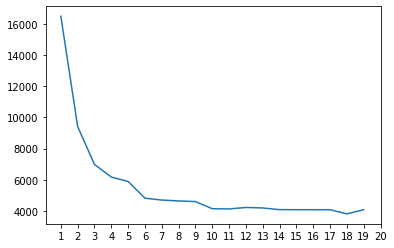

In [195]:
fig = plt.figure()
plt.plot(inertia_log)
plt.xticks(range(20),labels = range(1,21))
plt.savefig('./plots/determine_k_using_elbow_method.png')
plt.show()
plt.close()

> Lets keep K = 6

#### Retraining the Kmeans object class using the optimal value of k

In [197]:
# for k = 6
K = 6
kmeans = KMeansClustering(K)
classes, inertia = kmeans.fit(train_clusters)
centroids = kmeans.centroids
np.unique(classes, return_counts = True)
train_df['clusterLabel'] = classes

Inertia for K = 6 = 4819.7482650283355


In [198]:
# verify if centroids shape is logically valid wrt shape of the data that goes into the algorithm
centroids.shape, train_clusters.shape

((6, 6), (425, 6))

### Plotting new_cases with respect to time  
This plot distinguishes the new_cases according the clusters that they were assigned to during the clustering algorithm

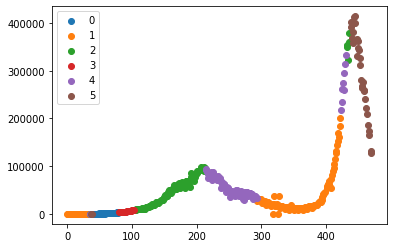

In [199]:
# plt.plot(train_df.sort_index().new_cases, hue = 'clusterLabel')
fig = plt.figure()
for i in range(K):
    s = train_df.loc[train_df['clusterLabel']==i].new_cases
    plt.scatter(s.index, s, label = i) 
plt.legend()
plt.savefig('./plots/clusters presented on new_cases plotted against time')

### Creating a function to generate Random Forest

In [200]:
def randomForest(train_df,K, min_samples = 5, max_depth = None, algo = "id3"):
    """
    algo is the type of tree required: "id3" or "CART"
    """
    random_forest = dict()
    for i in range(K):
        data = train_df.loc[train_df['clusterLabel']==i].drop(columns = ['clusterLabel'])
        decisionTreeInstance = DecisionTreeRegressor(data, min_samples = min_samples, max_depth = max_depth, algo = 'id3')
        tree = decisionTreeInstance.build_tree(data)
        random_forest[i] = [decisionTreeInstance, tree]
    return random_forest

### Creating a function to predict a sample using the Random Forest

In [244]:
def forest_sample_predict(sample, inputforest):
    """
    sample should be one row of the pandas dataframe
    """
    input_values = sample[:-1].values
    clusterLabel = np.argmin(np.sum((centroids - input_values)**2 , axis = 1, keepdims = 1))
    class_object = inputforest[clusterLabel][0]
    tree_object = inputforest[clusterLabel][1]
    prediction = class_object.predict_sample(sample, tree_object)
    return prediction

## PART II: A. Creating a Forest with ID3 trees

In [203]:
id3Forest = randomForest(train_df, K,min_samples = 5, algo = 'id3') #K = 6 defined above

returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 2
returning a leaf of depth 2
returning a leaf of depth 3
returning a leaf of depth 6
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6


/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 5
returning a leaf of depth 8
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a le

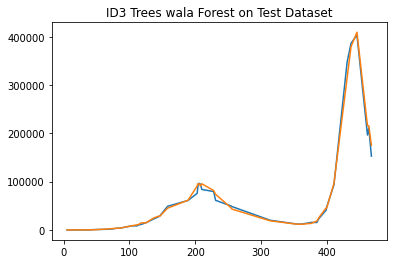

In [238]:
id3ForestPredictions = test_df.apply(forest_sample_predict, axis = 1, args = (id3Forest,))
actual_values = test_df.iloc[:,-1]
plt.plot(actual.sort_index(), label = "Actual")
plt.plot(id3ForestPredictions.sort_index(), label = "Predicted")
plt.title("ID3 Trees wala Forest on Test Dataset")
plt.savefig("./plots/id3forest.png")
plt.show()

In [240]:
actual_test_values = test_df.iloc[:,-1]
actual_train_values = train_df.iloc[:,-2]
id3ForestPredictions = test_df.apply(forest_sample_predict, axis = 1, args = (id3Forest,))
id3ForestPredictions_train = train_df.iloc[:,:-1].apply(forest_sample_predict, axis = 1, args = (id3Forest,))
print("Training R2 Score: ", R2_score(id3ForestPredictions_train, actual_train_values))
print("Testing R2 Score: ", R2_score(id3ForestPredictions, actual_test_values))


Training R2 Score:  0.9983385931517338
Testing R2 Score:  0.995030507703323


## PART II: B. Creating a Forest with CART trees

In [242]:
CARTForest = randomForest(train_df, K,min_samples = 5, algo = 'CART') #K = 6 defined above

returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 4
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 4
returning a leaf of depth 2
returning a leaf of depth 2
returning a leaf of depth 3
returning a leaf of depth 6
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of 

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:52: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 7
returning a leaf of depth 5
returning a leaf of depth 8
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 11
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a leaf of depth 5
returning a le

In [243]:
actual_test_values = test_df.iloc[:,-1]
actual_train_values = train_df.iloc[:,-2]
CARTForestPredictions = test_df.apply(forest_sample_predict, axis = 1, args = (CARTForest,))
CARTForestPredictions_train = train_df.iloc[:,:-1].apply(forest_sample_predict, axis = 1, args = (CARTForest,))
print("Training R2 Score: ", R2_score(CARTForestPredictions_train, actual_train_values))
print("Testing R2 Score: ", R2_score(CARTForestPredictions, actual_test_values))


Training R2 Score:  0.9983385931517338
Testing R2 Score:  0.995030507703323


### PART II: C. Comparing ID3 trees and CART Trees' performances in A. and B.

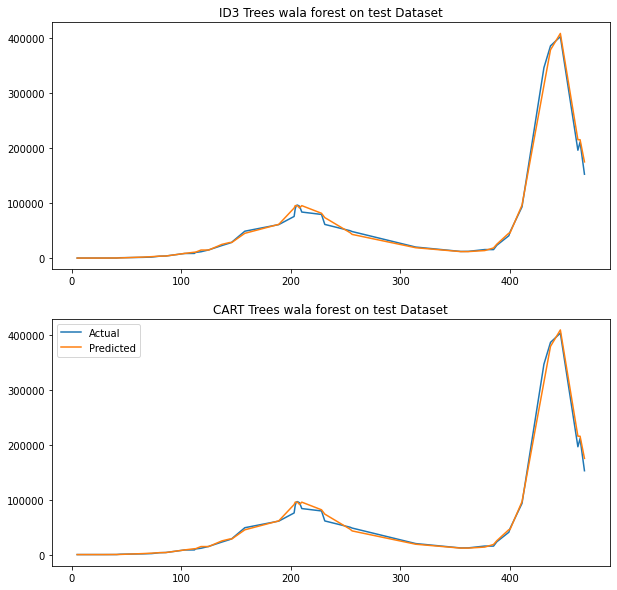

In [245]:
fig, ax1 = plt.subplots(2,1,figsize = (10,10))
ax1[0].plot(actual_test_values.sort_index(), label = "Actual")
ax1[0].plot(id3ForestPredictions.sort_index(), label = "Predicted")
ax1[0].set_title("ID3 Trees wala forest on test Dataset")

ax1[1].plot(actual_test_values.sort_index(), label = "Actual")
ax1[1].plot(CARTForestPredictions.sort_index(), label = "Predicted")
ax1[1].set_title("CART Trees wala forest on test Dataset")
plt.legend()
plt.savefig("./plots/KMeansForests.png")
plt.show()


> We can see that both type of trees are giving similar r2_score value on test dataset. 
Had we been given a slightly larger dataset, there might have been a difference, since the individual performace of ID3 trees has been better in our case.
Also We might even achieve better results for the KMeans forest if we somehow have the provision to tune all the different trees. (Manually would be very tedious)

# Final Conclustion
## Final comparison of all performed experiments
| Algorithm     | R_squared_Train      | R_squared_Test     |
| ------------- | ------------- | -------- |
| ID3          | 0.9988771601847459         | 0.9969609373394662  |
| CART           | 0.9748913877586478         | 0.9699469005965266  |
| ID3Forest    |  0.9983385931517338 | 0.995030507703323 |
| CARTForest   | 0.9983385931517338 |  0.995030507703323 |